In [1]:
print("Hello World")

Hello World


In [2]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")


In [3]:
df = pd.read_excel(r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx')

In [35]:
dataset_path = r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx'

In [5]:
df.head(5)

,SL.NO,DATE,SHIFT DUTY,QUERY/REQUEST/COMPLAINT,COMPLAINT DETAILS,COMPLAINT NUMBER,SECTION,SUB-DIVISION,DIVISION,CIRCLE,...,DEPT,CLOSED/OPEN,REMARKS,TWEET-LINK,COMPLAINANT NAME,COMPLAINT RECEIVED TIME,RESPONSE TIME,SECOND RESPONSE TIME,FINAL RESPONSE TIME,FINAL RESPONSE DATE DD/MM/YYYY
0,1,2022-06-10,NaN,NaN,Mr. Mohan Maharana complaint regarding the fun...,NaN,NaN,NaN,NaN,NaN,...,O&M,Closed,"Dear Sir, Badchana is not coming under TPWODL ...",https://twitter.com/MohanMaharana4/status/1535...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022-06-10,NaN,NaN,Mr.Bhawanispanda complaint regarding the repla...,4206102206136,SECTION-II,JUNAGARH,KWED,KALAHANDI,...,O&M,Closed,"Dear Sir, It is being taken up with the concer...",https://twitter.com/bhawanispanda/status/15351...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022-06-10,NaN,NaN,Mr. Dumb.Orator complaint regarding the unauth...,NaN,NaN,NaN,NaN,NaN,...,O&M,Closed,"Dear Sir,\nA team have visited the site and ch...",https://twitter.com/de_moaned/status/153511482...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022-06-10,NaN,NaN,"Frequent power interuption At- Sihinapada,Masa...",NaN,NaN,NUAPADA,NUAPADA,KALAHANDI,...,O&M,Closed,"Dear Sir, Due to some technical issue, power s...",https://twitter.com/DoleswarDas/status/1535110...,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022-06-10,NaN,NaN,Mr. akshya_patra tweeted that DTR is in unsafe...,4206102207051,SAINTALA,"SDO-2,TITLAGARH",TITLAGARH,BOLANGIR,...,O&M,Closed,"Dear Sir, It is being taken up with the concer...",https://twitter.com/akshya_patra/status/153510...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 32491, Columns: 23


In [7]:
print(df.dtypes)

SL.NO                                      int64
DATE                              datetime64[ns]
SHIFT DUTY                                object
QUERY/REQUEST/COMPLAINT                   object
COMPLAINT DETAILS                         object
COMPLAINT NUMBER                          object
SECTION                                   object
SUB-DIVISION                              object
DIVISION                                  object
CIRCLE                                    object
COMPLAINT TYPE                            object
CONSUMER NUMBER                           object
MOBILE NUMB                               object
DEPT                                      object
CLOSED/OPEN                               object
REMARKS                                   object
TWEET-LINK                                object
COMPLAINANT NAME                          object
COMPLAINT RECEIVED TIME                   object
RESPONSE TIME                             object
SECOND RESPONSE TIME

In [8]:
df.isnull().sum()

SL.NO                                 0
DATE                                  0
SHIFT DUTY                        24885
QUERY/REQUEST/COMPLAINT           29336
COMPLAINT DETAILS                     0
COMPLAINT NUMBER                  24336
SECTION                           10591
SUB-DIVISION                       7650
DIVISION                           7302
CIRCLE                             7392
COMPLAINT TYPE                        0
CONSUMER NUMBER                   22374
MOBILE NUMB                       27393
DEPT                                  0
CLOSED/OPEN                           0
REMARKS                              55
TWEET-LINK                            0
COMPLAINANT NAME                    586
COMPLAINT RECEIVED TIME             557
RESPONSE TIME                       610
SECOND RESPONSE TIME              23321
FINAL RESPONSE TIME               20133
FINAL RESPONSE DATE DD/MM/YYYY    19908
dtype: int64

In [9]:
nuldata = df.isnull().sum()


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32491 entries, 0 to 32490
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   SL.NO                           32491 non-null  int64         
 1   DATE                            32491 non-null  datetime64[ns]
 2   SHIFT DUTY                      7606 non-null   object        
 3   QUERY/REQUEST/COMPLAINT         3155 non-null   object        
 4   COMPLAINT DETAILS               32491 non-null  object        
 5   COMPLAINT NUMBER                8155 non-null   object        
 6   SECTION                         21900 non-null  object        
 7   SUB-DIVISION                    24841 non-null  object        
 8   DIVISION                        25189 non-null  object        
 9   CIRCLE                          25099 non-null  object        
 10  COMPLAINT TYPE                  32491 non-null  object        
 11  CO

In [11]:
import plotly.express as px
import pandas as pd

# Assume df is already defined
# Calculate missing values per column
null_data = df.isnull().sum().reset_index()

# Rename columns for Plotly
null_data.columns = ["Column", "Missing Values"]

# Create bar chart
fig = px.bar(
    null_data,
    x="Column",
    y="Missing Values",
    title="Missing Values per Column",
    text="Missing Values",
    color="Missing Values",
    color_continuous_scale="Blues"
)

# Show values on bars
fig.update_traces(
    texttemplate='%{text}',
    textposition='outside'
)

# Improve layout
fig.update_layout(
    xaxis_title="Columns",
    yaxis_title="Count of Missing Values",
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Display chart
fig.show()



In [12]:
import pandas as pd
import plotly.express as px
from typing import Optional
from plotly.graph_objs import Figure

# src/visualization/dashboard.py

def figure_missing_value_figure_plot(
    dataset_path: str,
    title: str = "Missing Values per Column",
    height: int = 600,
    width: int = 1200,
) -> Optional[Figure]:
    """
    Reads a dataset from the given path and plots missing values per column.

    Parameters
    ----------
    dataset_path : str
        Path to the dataset file (Excel).
    title : str, optional
        Chart title.
    height : int, optional
        Figure height.
    width : int, optional
        Figure width.

    Returns
    -------
    plotly.graph_objs.Figure or None
        Plotly figure if missing values exist, otherwise None.
    """

    # Read dataset
    df = pd.read_excel(dataset_path)

    # Calculate missing values per column
    null_data = df.isnull().sum().reset_index()
    null_data.columns = ["Column", "Missing Values"]

    # Filter columns with missing values
    null_data = null_data[null_data["Missing Values"] > 0]

    # If no missing values, return None
    if null_data.empty:
        return None

    # Create bar chart
    fig = px.bar(
        null_data,
        x="Column",
        y="Missing Values",
        title=title,
        text="Missing Values",
        color="Missing Values",
        color_continuous_scale="Blues",
    )

    # Show values on bars
    fig.update_traces(
        texttemplate="%{text}",
        textposition="outside"
    )

    # Improve layout
    fig.update_layout(
        xaxis_title="Columns",
        yaxis_title="Count of Missing Values",
        uniformtext_minsize=8,
        uniformtext_mode="hide",
        height=height,
        width=width,
        showlegend=False,
    )

    return fig


In [13]:
plt = figure_missing_value_figure_plot(dataset_path=dataset_path)

In [14]:
plt

In [15]:
import pandas as pd
from typing import Optional, Dict, Any

# src/visualization/dashboard.py

def report_missing_values(
    dataset_path: str
) -> Dict[str, Any]:
    """
    Reads a dataset from the given path and generates
    a JSON report of missing values per column.

    Parameters
    ----------
    dataset_path : str
        Path to the dataset file (Excel).

    Returns
    -------
    Dict[str, Any]
        JSON-style report containing missing value statistics.
    """

    # Read dataset
    df = pd.read_excel(dataset_path)

    total_rows = len(df)

    # Calculate missing values
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / total_rows) * 100

    # Build report dataframe
    report_df = pd.DataFrame({
        "column": missing_count.index,
        "missing_count": missing_count.values,
        "missing_percentage": missing_percent.values.round(2)
    })

    # Filter columns with missing values only
    report_df = report_df[report_df["missing_count"] > 0]

    # Final JSON report
    report = {
        "dataset_path": dataset_path,
        "total_rows": total_rows,
        "total_columns": df.shape[1],
        "columns_with_missing_values": int(report_df.shape[0]),
        "missing_values_summary": report_df.to_dict(orient="records")
    }

    return report


In [16]:
missing_values_reports = report_missing_values(dataset_path=dataset_path)

In [17]:
missing_values_reports

{'dataset_path': 'C:\\Users\\TPWODL\\New folder_Content\\Twitter_X_Flow_Prediction_Tp\\data\\raw\\twitter_x_data.xlsx',
 'total_rows': 32491,
 'total_columns': 23,
 'columns_with_missing_values': 16,
 'missing_values_summary': [{'column': 'SHIFT DUTY',
   'missing_count': 24885,
   'missing_percentage': 76.59},
  {'column': 'QUERY/REQUEST/COMPLAINT',
   'missing_count': 29336,
   'missing_percentage': 90.29},
  {'column': 'COMPLAINT NUMBER',
   'missing_count': 24336,
   'missing_percentage': 74.9},
  {'column': 'SECTION', 'missing_count': 10591, 'missing_percentage': 32.6},
  {'column': 'SUB-DIVISION',
   'missing_count': 7650,
   'missing_percentage': 23.54},
  {'column': 'DIVISION', 'missing_count': 7302, 'missing_percentage': 22.47},
  {'column': 'CIRCLE', 'missing_count': 7392, 'missing_percentage': 22.75},
  {'column': 'CONSUMER NUMBER',
   'missing_count': 22374,
   'missing_percentage': 68.86},
  {'column': 'MOBILE NUMB',
   'missing_count': 27393,
   'missing_percentage': 84.3

In [18]:
df.columns

Index(['SL.NO', 'DATE', 'SHIFT DUTY', 'QUERY/REQUEST/COMPLAINT',
       'COMPLAINT DETAILS', 'COMPLAINT NUMBER', 'SECTION', 'SUB-DIVISION',
       'DIVISION', 'CIRCLE', 'COMPLAINT TYPE', 'CONSUMER NUMBER',
       'MOBILE NUMB', 'DEPT', 'CLOSED/OPEN', 'REMARKS', 'TWEET-LINK',
       'COMPLAINANT NAME', 'COMPLAINT RECEIVED TIME', 'RESPONSE TIME',
       'SECOND RESPONSE TIME', 'FINAL RESPONSE TIME',
       'FINAL RESPONSE DATE DD/MM/YYYY'],
      dtype='object')

In [19]:
pivot_df = pd.pivot_table(
    df,
    index="COMPLAINT TYPE",   # rows
    columns="DEPT",           # columns
    values="CLOSED/OPEN",     # values to aggregate
    aggfunc="count"           # or "sum", "mean" depending on your need
).fillna(0)                   # replace NaN with 0

In [20]:
pivot_df

DEPT,Commercial,O&M,Other
COMPLAINT TYPE,,,
Billing,794.0,10.0,0.0
Civil Works,0.0,1.0,0.0
Civil works,0.0,1852.0,5.0
Electrification,0.0,650.0,0.0
Low Voltage,0.0,1304.0,0.0
Metering,192.0,1.0,0.0
NO Power Supply,0.0,1.0,0.0
NSC,733.0,6.0,3.0
No Power Supply,0.0,7696.0,23.0


In [21]:
df.columns

Index(['SL.NO', 'DATE', 'SHIFT DUTY', 'QUERY/REQUEST/COMPLAINT',
       'COMPLAINT DETAILS', 'COMPLAINT NUMBER', 'SECTION', 'SUB-DIVISION',
       'DIVISION', 'CIRCLE', 'COMPLAINT TYPE', 'CONSUMER NUMBER',
       'MOBILE NUMB', 'DEPT', 'CLOSED/OPEN', 'REMARKS', 'TWEET-LINK',
       'COMPLAINANT NAME', 'COMPLAINT RECEIVED TIME', 'RESPONSE TIME',
       'SECOND RESPONSE TIME', 'FINAL RESPONSE TIME',
       'FINAL RESPONSE DATE DD/MM/YYYY'],
      dtype='object')

In [22]:
df.shape

(32491, 23)

In [23]:
import pandas as pd

# First, make sure DATE is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Add a YEAR column for grouping
df['YEAR'] = df['DATE'].dt.year

# Pivot table: count CLOSED/OPEN per DATE and YEAR
pivot_df = pd.pivot_table(
    df,
    index=['YEAR', 'DATE'],          # rows: year + date
    columns='CLOSED/OPEN',           # columns: status
    values='COMPLAINT TYPE',         # any column to count
    aggfunc='count',                 # count occurrences
    fill_value=0
)

In [24]:
pivot_df

CLOSED/OPEN      Closed  Open  closed
YEAR DATE                            
2022 2022-06-10      10     0       0
     2022-06-11      12     0       0
     2022-06-12       5     0       0
     2022-06-13      15     0       0
     2022-06-14      16     0       0
...                 ...   ...     ...
2025 2025-12-09      15     1       0
     2025-12-10      17     2       0
     2025-12-11       6     3       0
     2025-12-12      18     4       0
     2025-12-13       5     4       0

[1282 rows x 3 columns]

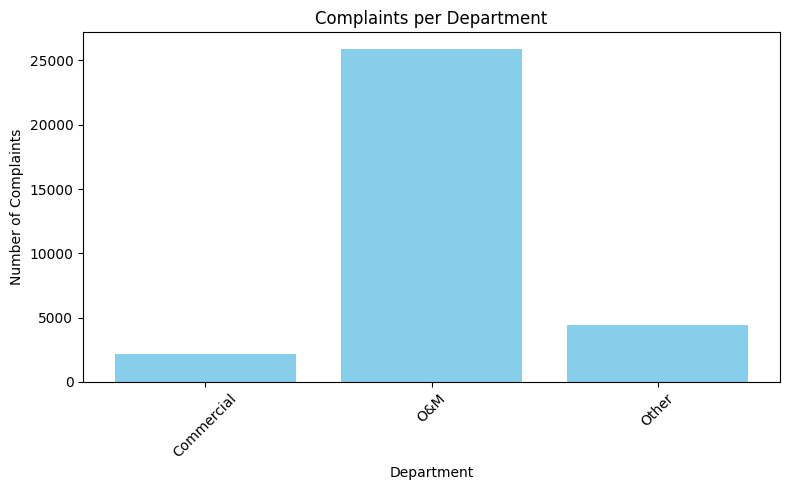

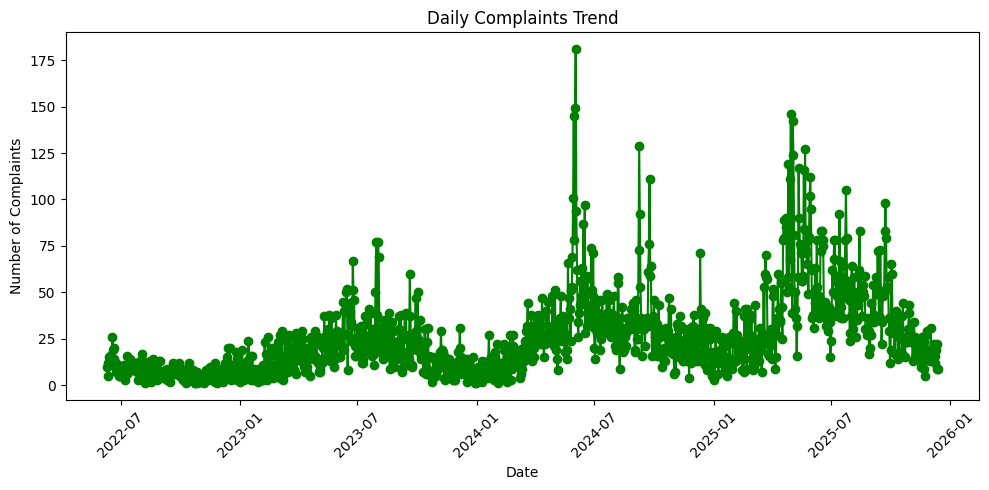

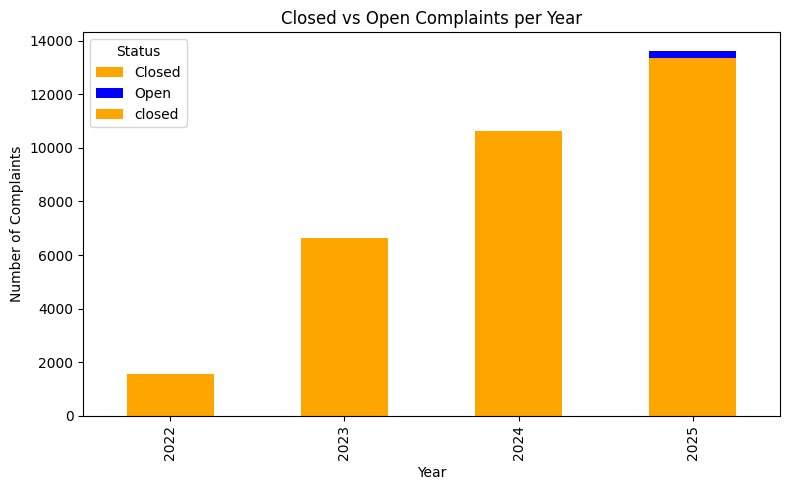

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare Data ---
# Ensure DATE is datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract YEAR
df['YEAR'] = df['DATE'].dt.year

# --- Step 2: Complaints per Department ---
dept_summary = df.groupby('DEPT').size().reset_index(name='TOTAL_COMPLAINTS')

plt.figure(figsize=(8,5))
plt.bar(dept_summary['DEPT'], dept_summary['TOTAL_COMPLAINTS'], color='skyblue')
plt.title("Complaints per Department")
plt.xlabel("Department")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 3: Daily Complaint Trend ---
daily_counts = df.groupby('DATE').size().reset_index(name='TOTAL_COMPLAINTS')

plt.figure(figsize=(10,5))
plt.plot(daily_counts['DATE'], daily_counts['TOTAL_COMPLAINTS'], marker='o', color='green')
plt.title("Daily Complaints Trend")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 4: Closed vs Open Complaints per Year ---
status_summary = df.groupby(['YEAR','CLOSED/OPEN']).size().reset_index(name='COUNT')
pivot_status = status_summary.pivot(index='YEAR', columns='CLOSED/OPEN', values='COUNT').fillna(0)

pivot_status.plot(kind='bar', stacked=True, figsize=(8,5), color=['orange','blue'])
plt.title("Closed vs Open Complaints per Year")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.legend(title="Status")
plt.tight_layout()
plt.show()


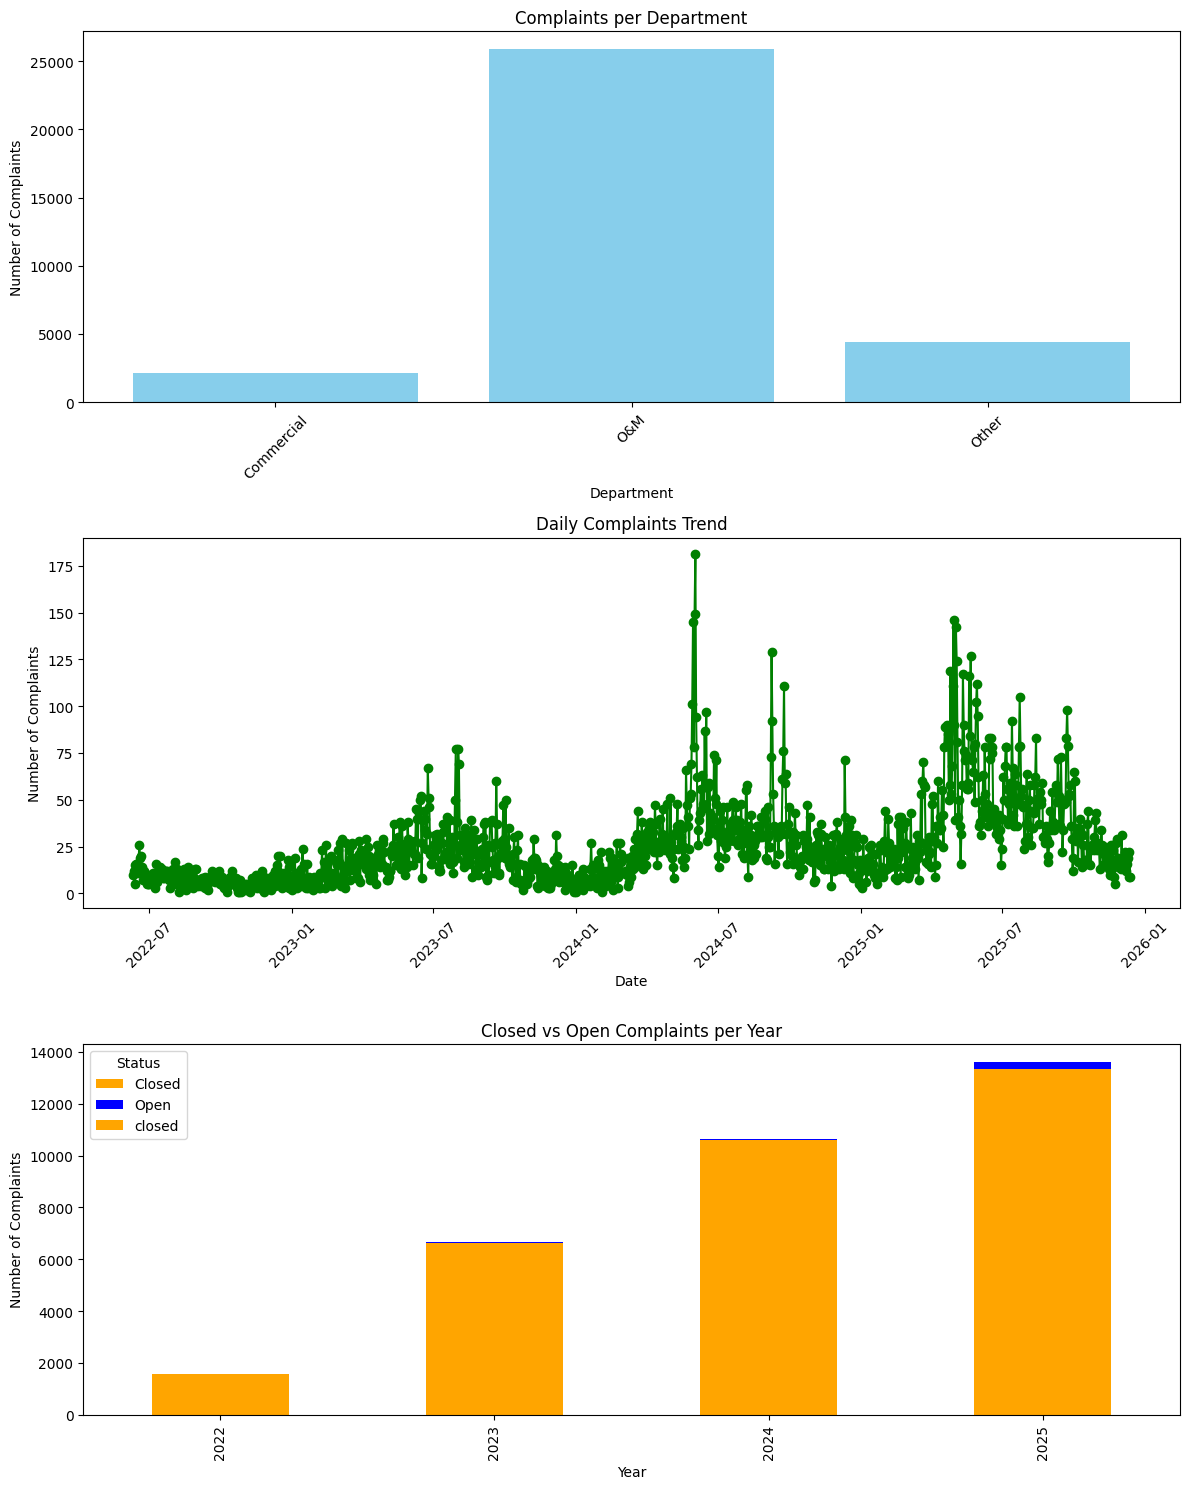

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare Data ---
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year

# --- Step 2: Summaries ---
dept_summary = df.groupby('DEPT').size().reset_index(name='TOTAL_COMPLAINTS')
daily_counts = df.groupby('DATE').size().reset_index(name='TOTAL_COMPLAINTS')
status_summary = df.groupby(['YEAR','CLOSED/OPEN']).size().reset_index(name='COUNT')
pivot_status = status_summary.pivot(index='YEAR', columns='CLOSED/OPEN', values='COUNT').fillna(0)

# --- Step 3: Combined Plot ---
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# 1. Complaints per Department (Bar Chart)
axes[0].bar(dept_summary['DEPT'], dept_summary['TOTAL_COMPLAINTS'], color='skyblue')
axes[0].set_title("Complaints per Department")
axes[0].set_xlabel("Department")
axes[0].set_ylabel("Number of Complaints")
axes[0].tick_params(axis='x', rotation=45)

# 2. Daily Complaints Trend (Line Chart)
axes[1].plot(daily_counts['DATE'], daily_counts['TOTAL_COMPLAINTS'], marker='o', color='green')
axes[1].set_title("Daily Complaints Trend")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Number of Complaints")
axes[1].tick_params(axis='x', rotation=45)

# 3. Closed vs Open Complaints per Year (Stacked Bar Chart)
pivot_status.plot(kind='bar', stacked=True, ax=axes[2], color=['orange','blue'])
axes[2].set_title("Closed vs Open Complaints per Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Number of Complaints")
axes[2].legend(title="Status")

plt.tight_layout()
plt.show()


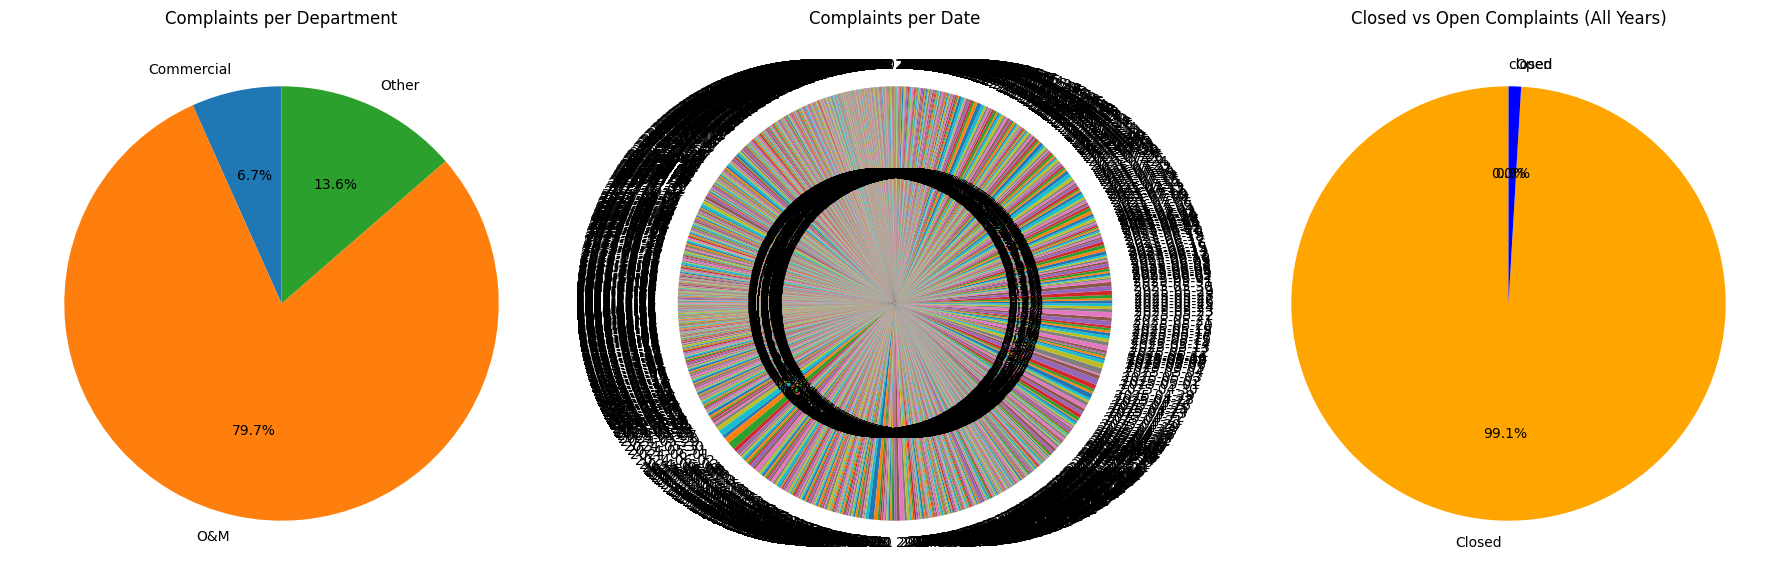

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare Data ---
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year

# --- Step 2: Summaries ---
dept_summary = df.groupby('DEPT').size().reset_index(name='TOTAL_COMPLAINTS')
daily_counts = df.groupby('DATE').size().reset_index(name='TOTAL_COMPLAINTS')
status_summary = df.groupby(['YEAR','CLOSED/OPEN']).size().reset_index(name='COUNT')

# --- Step 3: Combined Pie Charts ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Complaints per Department
axes[0].pie(
    dept_summary['TOTAL_COMPLAINTS'],
    labels=dept_summary['DEPT'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Complaints per Department")

# 2. Daily Complaints (aggregate as pie of totals per date)
axes[1].pie(
    daily_counts['TOTAL_COMPLAINTS'],
    labels=daily_counts['DATE'].dt.strftime('%Y-%m-%d'),
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Complaints per Date")

# 3. Closed vs Open per Year (pie for each year combined)
# Aggregate across years
status_total = status_summary.groupby('CLOSED/OPEN')['COUNT'].sum().reset_index()

axes[2].pie(
    status_total['COUNT'],
    labels=status_total['CLOSED/OPEN'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['orange','blue']
)
axes[2].set_title("Closed vs Open Complaints (All Years)")

plt.tight_layout()
plt.show()


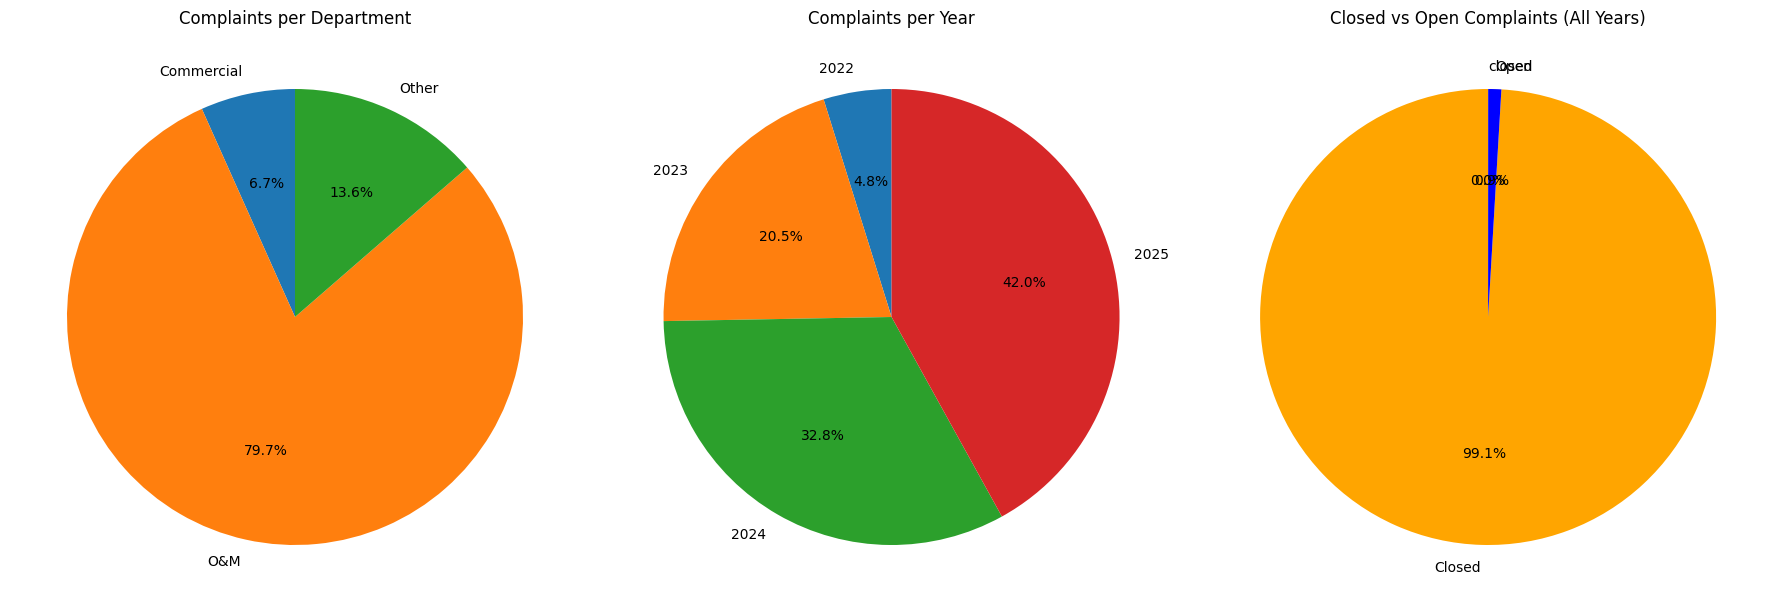

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare Data ---
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year

# --- Step 2: Summaries ---
dept_summary = df.groupby('DEPT').size().reset_index(name='TOTAL_COMPLAINTS')
yearly_counts = df.groupby('YEAR').size().reset_index(name='TOTAL_COMPLAINTS')
status_summary = df.groupby(['YEAR','CLOSED/OPEN']).size().reset_index(name='COUNT')

# --- Step 3: Combined Pie Charts ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Complaints per Department
axes[0].pie(
    dept_summary['TOTAL_COMPLAINTS'],
    labels=dept_summary['DEPT'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Complaints per Department")

# 2. Complaints per Year (instead of per Date)
axes[1].pie(
    yearly_counts['TOTAL_COMPLAINTS'],
    labels=yearly_counts['YEAR'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Complaints per Year")

# 3. Closed vs Open (All Years Combined)
status_total = status_summary.groupby('CLOSED/OPEN')['COUNT'].sum().reset_index()
axes[2].pie(
    status_total['COUNT'],
    labels=status_total['CLOSED/OPEN'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['orange','blue']
)
axes[2].set_title("Closed vs Open Complaints (All Years)")

plt.tight_layout()
plt.show()


In [39]:
df.columns


Index(['SL.NO', 'DATE', 'SHIFT DUTY', 'QUERY/REQUEST/COMPLAINT',
       'COMPLAINT DETAILS', 'COMPLAINT NUMBER', 'SECTION', 'SUB-DIVISION',
       'DIVISION', 'CIRCLE', 'COMPLAINT TYPE', 'CONSUMER NUMBER',
       'MOBILE NUMB', 'DEPT', 'CLOSED/OPEN', 'REMARKS', 'TWEET-LINK',
       'COMPLAINANT NAME', 'COMPLAINT RECEIVED TIME', 'RESPONSE TIME',
       'SECOND RESPONSE TIME', 'FINAL RESPONSE TIME',
       'FINAL RESPONSE DATE DD/MM/YYYY', 'YEAR'],
      dtype='object')

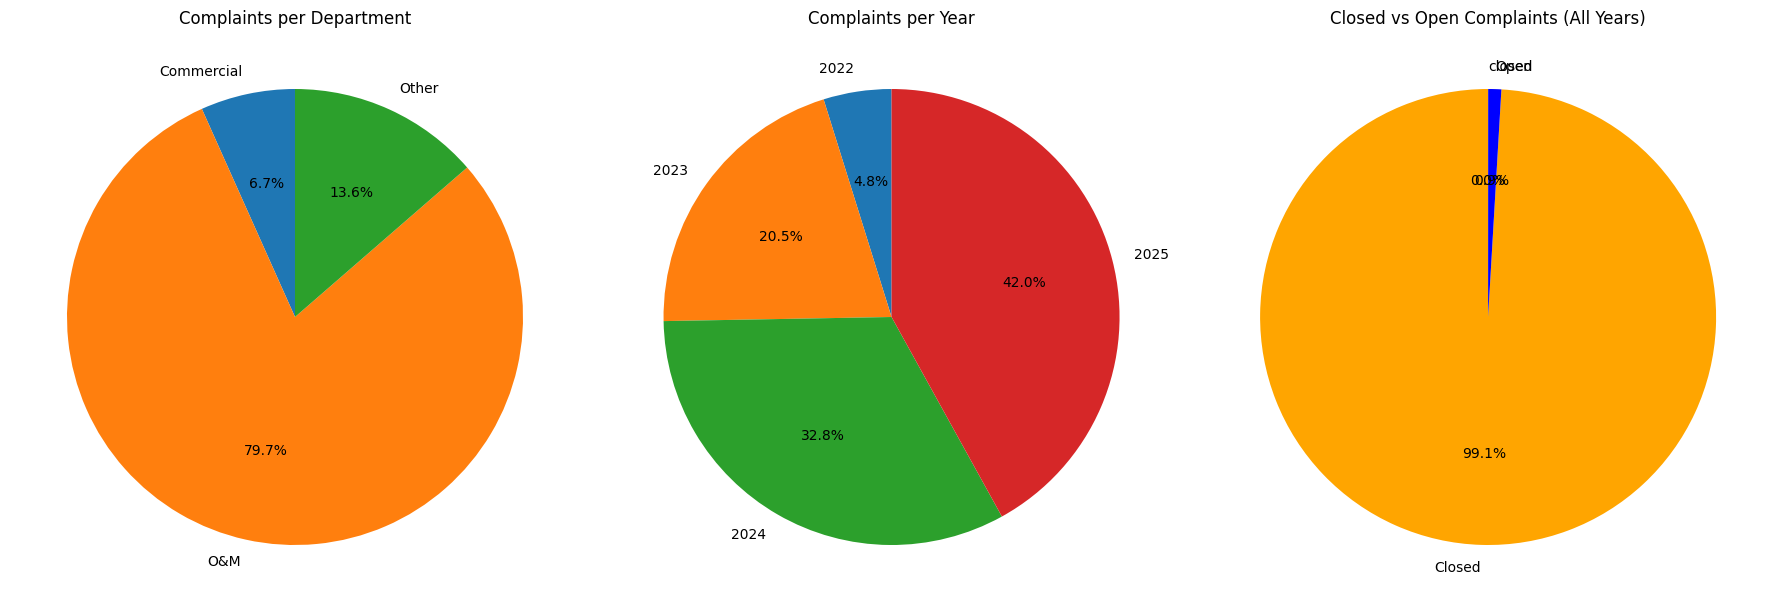

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_complaints_data(data_path):
    """
    Process complaints data and generate pie chart visualizations.
    
    Parameters:
    -----------
    data_path : str
        Path to the CSV or Excel file containing complaints data
        
    Returns:
    --------
    fig : matplotlib figure object with pie charts
    """
    # Load data based on file extension
    file_extension = os.path.splitext(data_path)[1].lower()
    
    if file_extension == '.csv':
        df = pd.read_csv(data_path)
    elif file_extension in ['.xlsx', '.xls']:
        df = pd.read_excel(data_path)
    else:
        raise ValueError(f"Unsupported file format: {file_extension}")
    
    # Prepare Data
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year
    
    # Generate Summaries
    dept_summary = df.groupby('DEPT').size().reset_index(name='TOTAL_COMPLAINTS')
    yearly_counts = df.groupby('YEAR').size().reset_index(name='TOTAL_COMPLAINTS')
    status_summary = df.groupby(['YEAR', 'CLOSED/OPEN']).size().reset_index(name='COUNT')
    status_total = status_summary.groupby('CLOSED/OPEN')['COUNT'].sum().reset_index()
    
    # Create Pie Charts
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].pie(dept_summary['TOTAL_COMPLAINTS'], labels=dept_summary['DEPT'], 
                autopct='%1.1f%%', startangle=90)
    axes[0].set_title("Complaints per Department")
    
    axes[1].pie(yearly_counts['TOTAL_COMPLAINTS'], labels=yearly_counts['YEAR'], 
                autopct='%1.1f%%', startangle=90)
    axes[1].set_title("Complaints per Year")
    
    axes[2].pie(status_total['COUNT'], labels=status_total['CLOSED/OPEN'], 
                autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
    axes[2].set_title("Closed vs Open Complaints (All Years)")
    
    plt.tight_layout()
    return fig

# Usage:
fig = process_complaints_data(r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx')
plt.show()



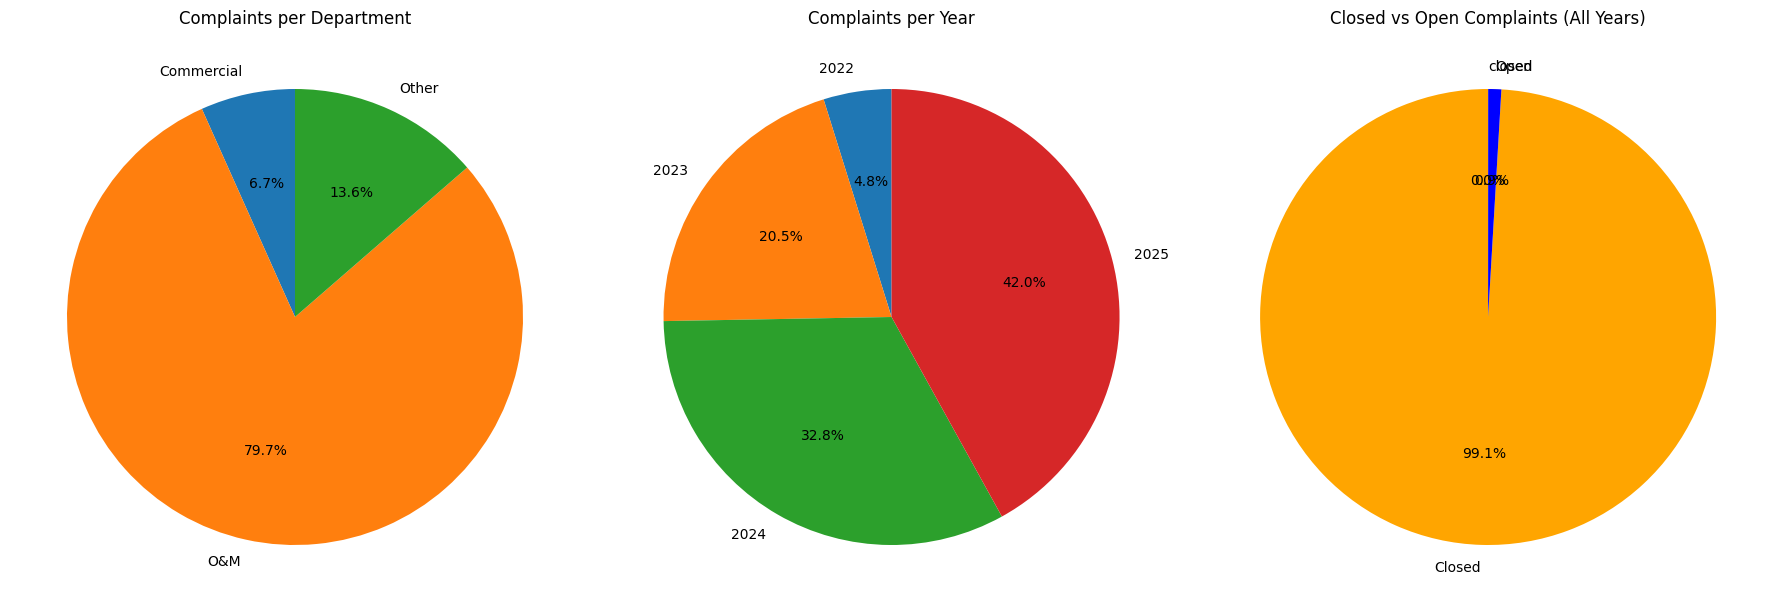

In [49]:

# Usage:
fig = process_complaints_data(r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx')
plt.show()


In [54]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_complaints_visualization(data_path):
    """
    Create interactive complaints visualization using Plotly.
    
    Parameters:
    -----------
    data_path : str
        Path to the CSV file containing complaints data
        
    Returns:
    --------
    fig : plotly.graph_objects.Figure
        Interactive Plotly figure with 3 subplots
    """
    
    # Load data
    df = pd.read_excel(data_path)
    
    # Prepare data
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year
    
    # Calculate summaries
    dept_summary = df.groupby('DEPT').size().reset_index(name='TOTAL_COMPLAINTS')
    dept_summary = dept_summary.sort_values('TOTAL_COMPLAINTS', ascending=False)
    
    daily_counts = df.groupby('DATE').size().reset_index(name='TOTAL_COMPLAINTS')
    
    status_summary = df.groupby(['YEAR', 'CLOSED/OPEN']).size().reset_index(name='COUNT')
    pivot_status = status_summary.pivot(index='YEAR', columns='CLOSED/OPEN', values='COUNT').fillna(0)
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=1,
        subplot_titles=(
            "Complaints per Department",
            "Daily Complaints Trend",
            "Closed vs Open Complaints per Year"
        ),
        vertical_spacing=0.12,
        specs=[[{"type": "bar"}],
               [{"type": "scatter"}],
               [{"type": "bar"}]]
    )
    
    # 1. Complaints per Department (Bar Chart)
    fig.add_trace(
        go.Bar(
            x=dept_summary['DEPT'],
            y=dept_summary['TOTAL_COMPLAINTS'],
            name='Department Complaints',
            marker_color='skyblue',
            hovertemplate='<b>%{x}</b><br>Complaints: %{y}<extra></extra>'
        ),
        row=1, col=1
    )
    
    # 2. Daily Complaints Trend (Line Chart)
    fig.add_trace(
        go.Scatter(
            x=daily_counts['DATE'],
            y=daily_counts['TOTAL_COMPLAINTS'],
            mode='lines+markers',
            name='Daily Complaints',
            line=dict(color='green', width=2),
            marker=dict(size=4),
            hovertemplate='<b>Date:</b> %{x|%Y-%m-%d}<br><b>Complaints:</b> %{y}<extra></extra>'
        ),
        row=2, col=1
    )
    
    # 3. Closed vs Open Complaints per Year (Stacked Bar Chart)
    years = pivot_status.index.tolist()
    
    for column in pivot_status.columns:
        fig.add_trace(
            go.Bar(
                x=years,
                y=pivot_status[column],
                name=column,
                marker_color='orange' if column == 'CLOSED' else 'blue',
                hovertemplate=f'<b>Year:</b> %{{x}}<br><b>{column}:</b> %{{y}}<extra></extra>'
            ),
            row=3, col=1
        )
    
    # Update layout
    fig.update_xaxes(title_text="Department", row=1, col=1)
    fig.update_yaxes(title_text="Number of Complaints", row=1, col=1)
    
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Number of Complaints", row=2, col=1)
    
    fig.update_xaxes(title_text="Year", row=3, col=1)
    fig.update_yaxes(title_text="Number of Complaints", row=3, col=1)
    
    # Update overall layout
    fig.update_layout(
        height=1200,
        showlegend=True,
        title_text="<b>Complaints Analysis Dashboard</b>",
        title_x=0.5,
        title_font_size=20,
        hovermode='closest',
        barmode='stack'
    )
    
    return fig


# Example usage:
# fig = create_complaints_visualization('complaints_data.csv')
# fig.show()  # Display in Jupyter/browser
# fig.write_html('complaints_dashboard.html')  # Save as HTML

In [55]:
fig = create_complaints_visualization(r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx')
fig.show()  # Display in Jupyter/browser

In [57]:
def process_complaints_data(data_path):
    """
    Process complaints data and generate interactive pie chart visualizations.
    
    Parameters:
    -----------
    data_path : str
        Path to the CSV or Excel file containing complaints data
        
    Returns:
    --------
    fig : plotly figure object with interactive pie charts
    """
    import pandas as pd
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import os
    
    # Load data based on file extension
    file_extension = os.path.splitext(data_path)[1].lower()
    
    if file_extension == '.csv':
        df = pd.read_csv(data_path)
    elif file_extension in ['.xlsx', '.xls']:
        df = pd.read_excel(data_path)
    else:
        raise ValueError(f"Unsupported file format: {file_extension}")
    
    # Prepare Data
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year
    
    # Generate Summaries
    dept_summary = df.groupby('DEPT').size().reset_index(name='TOTAL_COMPLAINTS')
    yearly_counts = df.groupby('YEAR').size().reset_index(name='TOTAL_COMPLAINTS')
    status_summary = df.groupby(['YEAR', 'CLOSED/OPEN']).size().reset_index(name='COUNT')
    status_total = status_summary.groupby('CLOSED/OPEN')['COUNT'].sum().reset_index()
    
    # Create Interactive Plotly Pie Charts
    fig = make_subplots(
        rows=1, cols=3,
        specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]],
        subplot_titles=("Complaints per Department", 
                       "Complaints per Year", 
                       "Closed vs Open Complaints (All Years)")
    )
    
    # Department pie chart
    fig.add_trace(
        go.Pie(labels=dept_summary['DEPT'], 
               values=dept_summary['TOTAL_COMPLAINTS'],
               name="Department"),
        row=1, col=1
    )
    
    # Year pie chart
    fig.add_trace(
        go.Pie(labels=yearly_counts['YEAR'], 
               values=yearly_counts['TOTAL_COMPLAINTS'],
               name="Year"),
        row=1, col=2
    )
    
    # Status pie chart
    fig.add_trace(
        go.Pie(labels=status_total['CLOSED/OPEN'], 
               values=status_total['COUNT'],
               marker=dict(colors=['orange', 'blue']),
               name="Status"),
        row=1, col=3
    )
    
    # Update layout
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(
        height=500,
        showlegend=True,
        title_text="Complaints Data Analysis"
    )
    
    return fig


In [58]:
process_complaints_data(r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx')